<a href="https://colab.research.google.com/github/shahab271069/Python-Course/blob/main/Sixth%20Session/Sixth_Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remote Sensing with Python

This notebook covers:
1. **Introduction to Remote Sensing**
2. Downloading satellite imagery using STAC or GEE.
3. Calculating Vegetation Indices with Python.

## Ancillary websites
1. Sentinel-hub (https://custom-scripts.sentinel-hub.com/custom-scripts/)
2. Earth Explorer (https://earthexplorer.usgs.gov/)
3. Google Earth Engine (https://earthengine.google.com/)
4. Google Earth Engine Python (https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api)
5. STAC in Python (https://stacspec.org/en/tutorials/1-read-stac-python/)
6. Plantery computer (https://planetarycomputer.microsoft.com/catalog#Imagery)

## 1. What is Remote Sensing?

Remote sensing is the process of acquiring information about Earth's surface without direct contact, typically using satellites or aircraft.

**Key concepts in remote sensing:**
- Spectral bands (e.g., Blue, Green, NIR, SWIR)
- Resolutions (spatial, temporal, spectral, and radiometric)
- Applications (e.g., agriculture, forestry, climate studies, urban planning)

## 2. Downloading Data Using STAC or GEE

The SpatioTemporal Asset Catalog (STAC) and Google Earth Engine (GEE) API allows easy access to geospatial datasets. We'll use the `cubo` library to search and download data.

### Installation
To use cubo with Python, install the following libraries if you haven't already:

```bash
pip install cubo[ee]
```

In [1]:
!pip install cubo[ee]

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.4 MB/s eta 0:00:00
  Created wheel for cubo: filename=cubo-2024.8.0-py3-none-any.whl size=10159 sha256=50d7f20ad7bb153a3bb296843b0e24636b3ef976a2aa9fc1e8b5ed13d6fde789
  Stored in directory: /root/.cache/

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import cubo
import xarray as xr
import ee

## We need to authenticate with earth engine

In [3]:
ee.Authenticate()
ee.Initialize(project='ee-shahab2710')

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


### Connect to a STAC Catalog or Google Earth Engine
We'll use cubo to download our data
cubo:

https://github.com/ESDS-Leipzig/cubo



## STAC

In [73]:
lat, lon = 51.344661, 9.844198
ds = cubo.create(
    lat=lat, # Central latitude of the cube
    lon=lon, # Central longitude of the cube
    collection="sentinel-2-l2a", # Name of the STAC collection
    bands=["B02","B03","B04", "B08", "B11"], # Bands to retrieve
    start_date="2016-06-01", # Start date of the cube
    end_date="2017-07-01", # End date of the cube
    edge_size=1280, # Edge size of the cube (px)
    units="m", # unit of edge size
    resolution=10, # Pixel size of the cube (m)
)

In [74]:
ds

<xarray.DataArray 'sentinel-2-l2a' (time: 76, band: 5, y: 128, x: 128)> Size: 50MB
dask.array<fetch_raster_window, shape=(76, 5, 128, 128), dtype=float64, chunksize=(1, 1, 128, 128), chunktype=numpy.ndarray>
Coordinates: (12/45)
  * time                                     (time) datetime64[ns] 608B 2016-...
    id                                       (time) <U54 16kB 'S2A_MSIL2A_201...
  * band                                     (band) <U3 60B 'B02' ... 'B11'
  * x                                        (x) float64 1kB 5.582e+05 ... 5....
  * y                                        (y) float64 1kB 5.689e+06 ... 5....
    eo:cloud_cover                           (time) float64 608B 78.89 ... 99.02
    ...                                       ...
    proj:bbox                                object 8B {5590200.0, 609780.0, ...
    common_name                              (band) <U6 120B 'blue' ... 'swir16'
    center_wavelength                        (band) float64 40B 0.49 ... 1.61
    full_width_half_max                      (band) float64 40B 0.098 ... 0.143
    epsg                                     int64 8B 32632
    cubo:distance_from_center                (y, x) float64 131kB 901.4 ... 8...
Attributes:
    collection:           sentinel-2-l2a
    stac:                 https://planetarycomputer.microsoft.com/api/stac/v1
    epsg:                 32632
    resolution:           10
    edge_size:            128
    edge_size_m:          1280
    central_lat:          51.344661
    central_lon:          9.844198
    central_y:            5688491.899227272
    central_x:            558796.6202049804
    time_coverage_start:  2016-06-01
    time_coverage_end:    2017-07-01

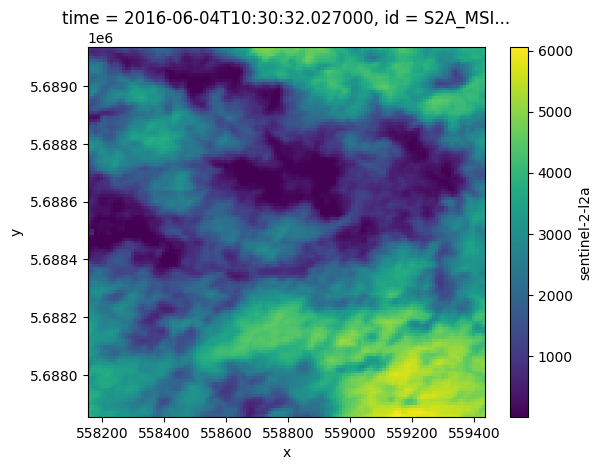

In [19]:
ds.sel(band="B02").isel(time=0).plot()

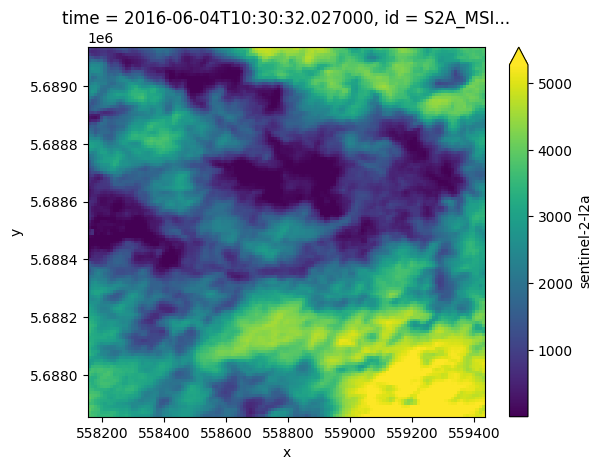

In [20]:
ds.sel(band="B02").isel(time=0).plot(robust=True)

In [75]:
dd = ds.where(ds['s2:high_proba_clouds_percentage']<1)

In [76]:
dd = dd.compute()

In [77]:
dd = dd.dropna(dim='time')

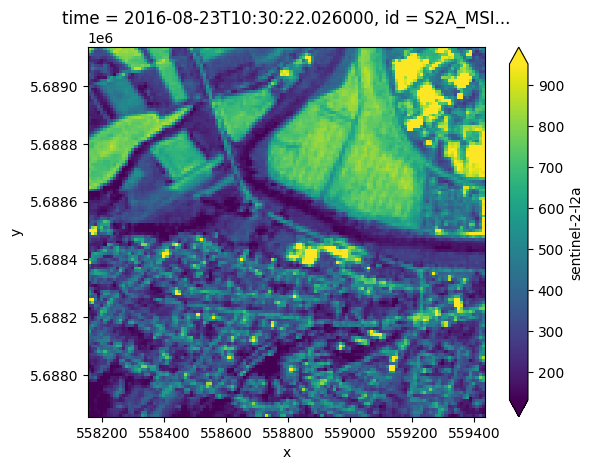

In [41]:
dd.sel(band="B02").isel(time=1).plot(robust=True)

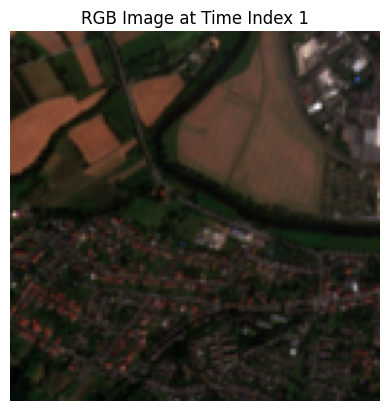

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dd' is your xarray DataArray as defined in the previous code
# and contains the bands 'B02', 'B03', and 'B04'

# Select a specific time step (e.g., time=0)
time_index = 1  # Change this to the desired time index

# Extract the RGB bands
red = dd.sel(band="B04").isel(time=time_index).values
green = dd.sel(band="B03").isel(time=time_index).values
blue = dd.sel(band="B02").isel(time=time_index).values

# Normalize the bands to the 0-1 range (important for proper visualization)
red = (red - np.min(red)) / (np.max(red) - np.min(red))
green = (green - np.min(green)) / (np.max(green) - np.min(green))
blue = (blue - np.min(blue)) / (np.max(blue) - np.min(blue))

# Create the RGB image
rgb_image = np.stack([red, green, blue], axis=-1)

# Display the image
plt.imshow(rgb_image)
plt.title(f"RGB Image at Time Index {time_index}")
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

## GEE

In [55]:
da = cubo.create(
    lat=lat, # Central latitude of the cube
    lon=lon, # Central longitude of the cube
    collection="COPERNICUS/S2_SR_HARMONIZED", # Id of the GEE collection
    bands=["B2","B3","B4", "B8", "B11"], # Bands to retrieve
    start_date="2016-01-01", # Start date of the cube
    end_date="2017-12-31", # End date of the cube
    edge_size=1280, # Edge size of the cube (px)
    units="m", # unit of edge size
    resolution=10, # Pixel size of the cube (m)
    gee=True # Use GEE instead of STAC
)

In [56]:
da

<xarray.DataArray 'COPERNICUS/S2_SR_HARMONIZED' (time: 48, band: 5, y: 128,
                                                 x: 128)> Size: 16MB
dask.array<transpose, shape=(48, 5, 128, 128), dtype=float32, chunksize=(48, 1, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * time                       (time) datetime64[ns] 384B 2017-04-20T10:34:54...
  * x                          (x) float64 1kB 5.582e+05 5.582e+05 ... 5.594e+05
  * y                          (y) float64 1kB 5.688e+06 5.688e+06 ... 5.689e+06
  * band                       (band) object 40B 'B2' 'B3' 'B4' 'B8' 'B11'
    cubo:distance_from_center  (y, x) float64 131kB 897.0 889.9 ... 892.1 899.1
Attributes:
    collection:           COPERNICUS/S2_SR_HARMONIZED
    stac:                 https://earthengine-stac.storage.googleapis.com/cat...
    epsg:                 32632
    resolution:           10
    edge_size:            128
    edge_size_m:          1280
    central_lat:          51.344661
    central_lon:          9.844198
    central_y:            5688491.899227272
    central_x:            558796.6202049804
    time_coverage_start:  2016-01-01
    time_coverage_end:    2017-12-31

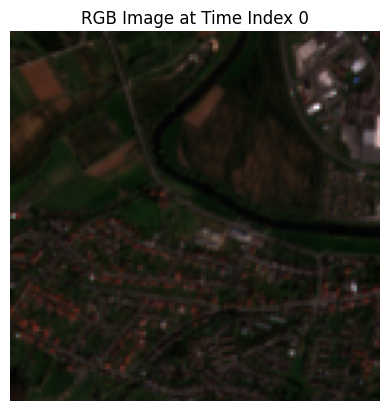

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Select a specific time step (e.g., time=0)
time_index = 0  # Change this to the desired time index

# Extract the RGB bands
red = da.sel(band="B4").isel(time=time_index).values
green = da.sel(band="B3").isel(time=time_index).values
blue = da.sel(band="B2").isel(time=time_index).values

# Normalize the bands to the 0-1 range (important for proper visualization)
red = (red - np.min(red)) / (np.max(red) - np.min(red))
green = (green - np.min(green)) / (np.max(green) - np.min(green))
blue = (blue - np.min(blue)) / (np.max(blue) - np.min(blue))

# Create the RGB image
rgb_image = np.flip(np.stack([red, green, blue], axis=-1),axis=0)

# Display the image
plt.imshow(rgb_image)
plt.title(f"RGB Image at Time Index {time_index}")
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

## 3. Calculating Vegetation Indices

Vegetation indices help assess plant health and cover using spectral bands.

### Common Vegetation Indices:
- **NDVI (Normalized Difference Vegetation Index):** Measures vegetation health using NIR and Red bands.
  \[ NDVI = \frac{NIR - Red}{NIR + Red} \]
- **EVI (Enhanced Vegetation Index):** Reduces atmospheric effects using NIR, Red, and Blue bands.
  \[ EVI = 2.5 \times \frac{NIR - Red}{NIR + C_1 \times Red - C_2 \times Blue + L} \]
- **SAVI (Soil-Adjusted Vegetation Index):**
  \[ SAVI = \frac{NIR - Red}{NIR + Red + L} \times (1 + L) \]
  where \( L \) is a soil brightness correction factor, typically 0.5.

- **GNDVI (Green Normalized Difference Vegetation Index):**
  \[ GNDVI = \frac{NIR - Green}{NIR + Green} \]

- **MSAVI (Modified Soil-Adjusted Vegetation Index):**
  \[ MSAVI = \frac{2 \times NIR + 1 - \sqrt{(2 \times NIR + 1)^2 - 8 \times (NIR - Red)}}{2} \]

- **NDWI (Normalized Difference Water Index):**
  \[ NDWI = \frac{NIR - SWIR1}{NIR + SWIR1} \]

- **NDMI (Normalized Difference Moisture Index):**
  \[ NDMI = \frac{NIR - SWIR1}{NIR + SWIR1} \]

In [65]:
da

<xarray.DataArray 'COPERNICUS/S2_SR_HARMONIZED' (time: 48, band: 5, y: 128,
                                                 x: 128)> Size: 16MB
dask.array<transpose, shape=(48, 5, 128, 128), dtype=float32, chunksize=(48, 1, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * time                       (time) datetime64[ns] 384B 2017-04-20T10:34:54...
  * x                          (x) float64 1kB 5.582e+05 5.582e+05 ... 5.594e+05
  * y                          (y) float64 1kB 5.688e+06 5.688e+06 ... 5.689e+06
  * band                       (band) object 40B 'B2' 'B3' 'B4' 'B8' 'B11'
    cubo:distance_from_center  (y, x) float64 131kB 897.0 889.9 ... 892.1 899.1
Attributes:
    collection:           COPERNICUS/S2_SR_HARMONIZED
    stac:                 https://earthengine-stac.storage.googleapis.com/cat...
    epsg:                 32632
    resolution:           10
    edge_size:            128
    edge_size_m:          1280
    central_lat:          51.344661
    central_lon:          9.844198
    central_y:            5688491.899227272
    central_x:            558796.6202049804
    time_coverage_start:  2016-01-01
    time_coverage_end:    2017-12-31

In [66]:
# Define functions for additional indices
def calculate_ndvi(nir, red):
    return ((nir - red) / (nir + red ))

def calculate_evi(nir, red, blue, G=2.5, C1=6, C2=7.5, L=1):
    return G * ((nir - red) / (nir + C1 * red - C2 * blue + L))

def calculate_savi(nir, red, L=0.5):
    return ((nir - red) / (nir + red + L)) * (1 + L)

def calculate_gndvi(nir, green):
    return (nir - green) / (nir + green)

def calculate_msavi(nir, red):
    return (2 * nir + 1 - np.sqrt((2 * nir + 1)**2 - 8 * (nir - red))) / 2

def calculate_ndwi(nir, swir1):
    return (nir - swir1) / (nir + swir1)

def calculate_ndmi(nir, swir1):
    return (nir - swir1) / (nir + swir1)



In [67]:
scale_factor = 0.0001
nir = da.sel(band="B8")*scale_factor
red = da.sel(band="B4")*scale_factor
green = da.sel(band="B3")*scale_factor
swir1 = da.sel(band="B11")*scale_factor
blue = da.sel(band="B2")*scale_factor

In [68]:
NDVI = calculate_ndvi(nir, red)
EVI = calculate_evi(nir, red, blue)
SAVI = calculate_savi(nir, red)
GNDVI = calculate_gndvi(nir, green)
MSAVI = calculate_msavi(nir, red)
NDWI = calculate_ndwi(nir, swir1)
NDMI = calculate_ndmi(nir, swir1)


/usr/local/lib/python3.10/dist-packages/dask/core.py:133: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


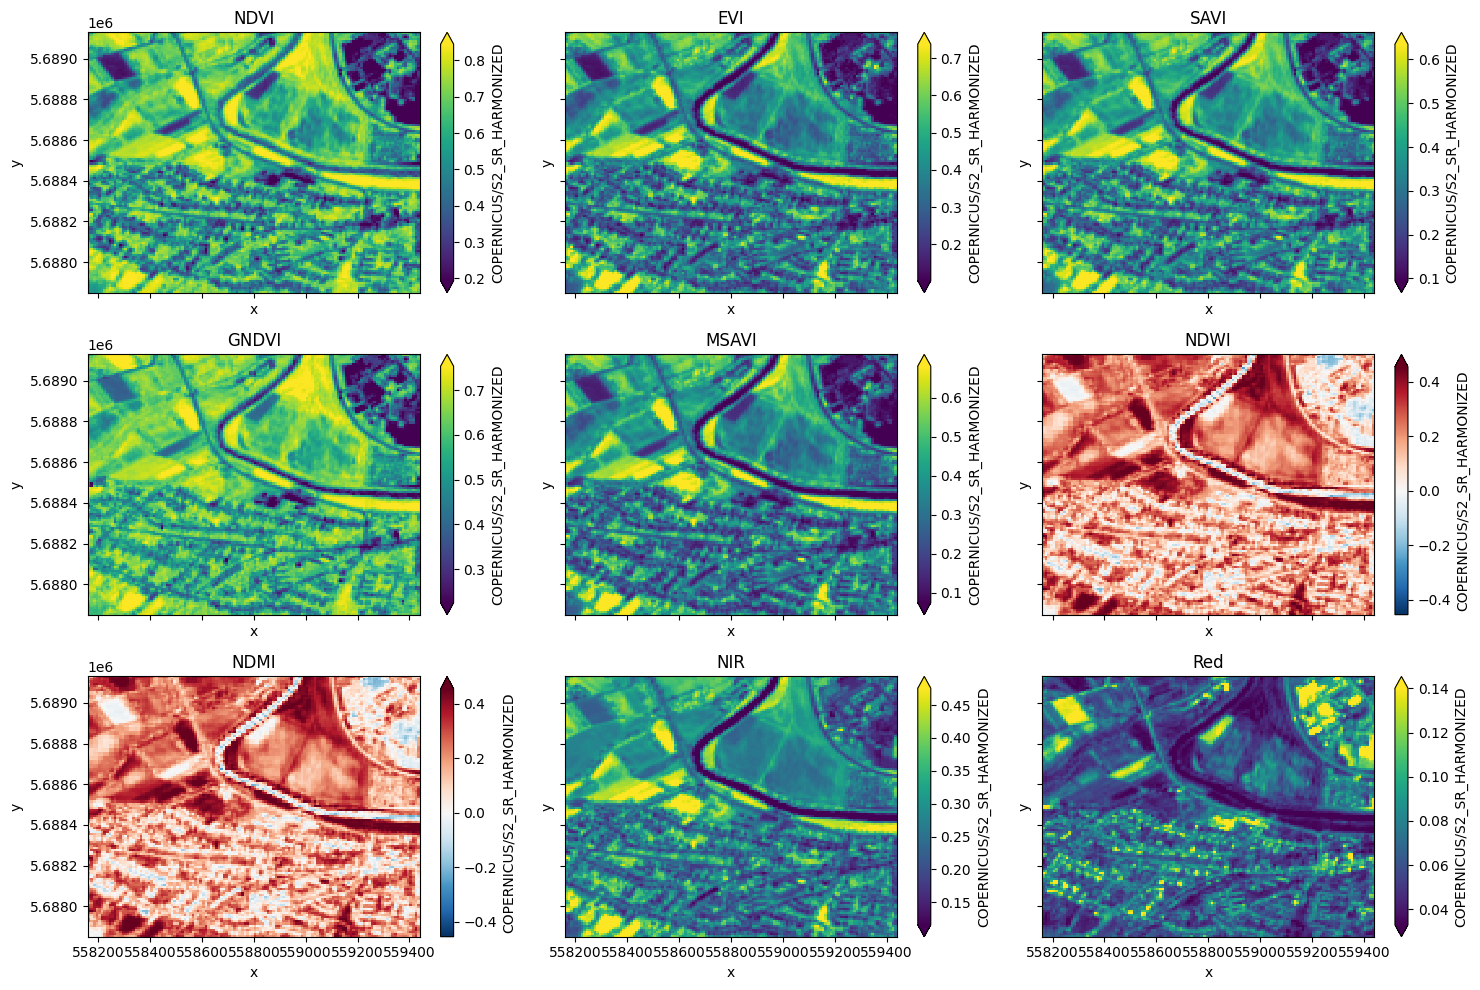

In [69]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10),sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the indices and their corresponding labels
indices = [NDVI, EVI, SAVI, GNDVI, MSAVI, NDWI, NDMI, nir, red]
labels = ["NDVI", "EVI", "SAVI", "GNDVI", "MSAVI", "NDWI", "NDMI", "NIR", "Red"]

# Iterate over the indices and plot each on a separate subplot
for i, index in enumerate(indices):
    index.isel(time=0).plot(ax=axes[i], robust=True)  # Plot the first time step
    axes[i].set_title(labels[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/dask/core.py:133: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


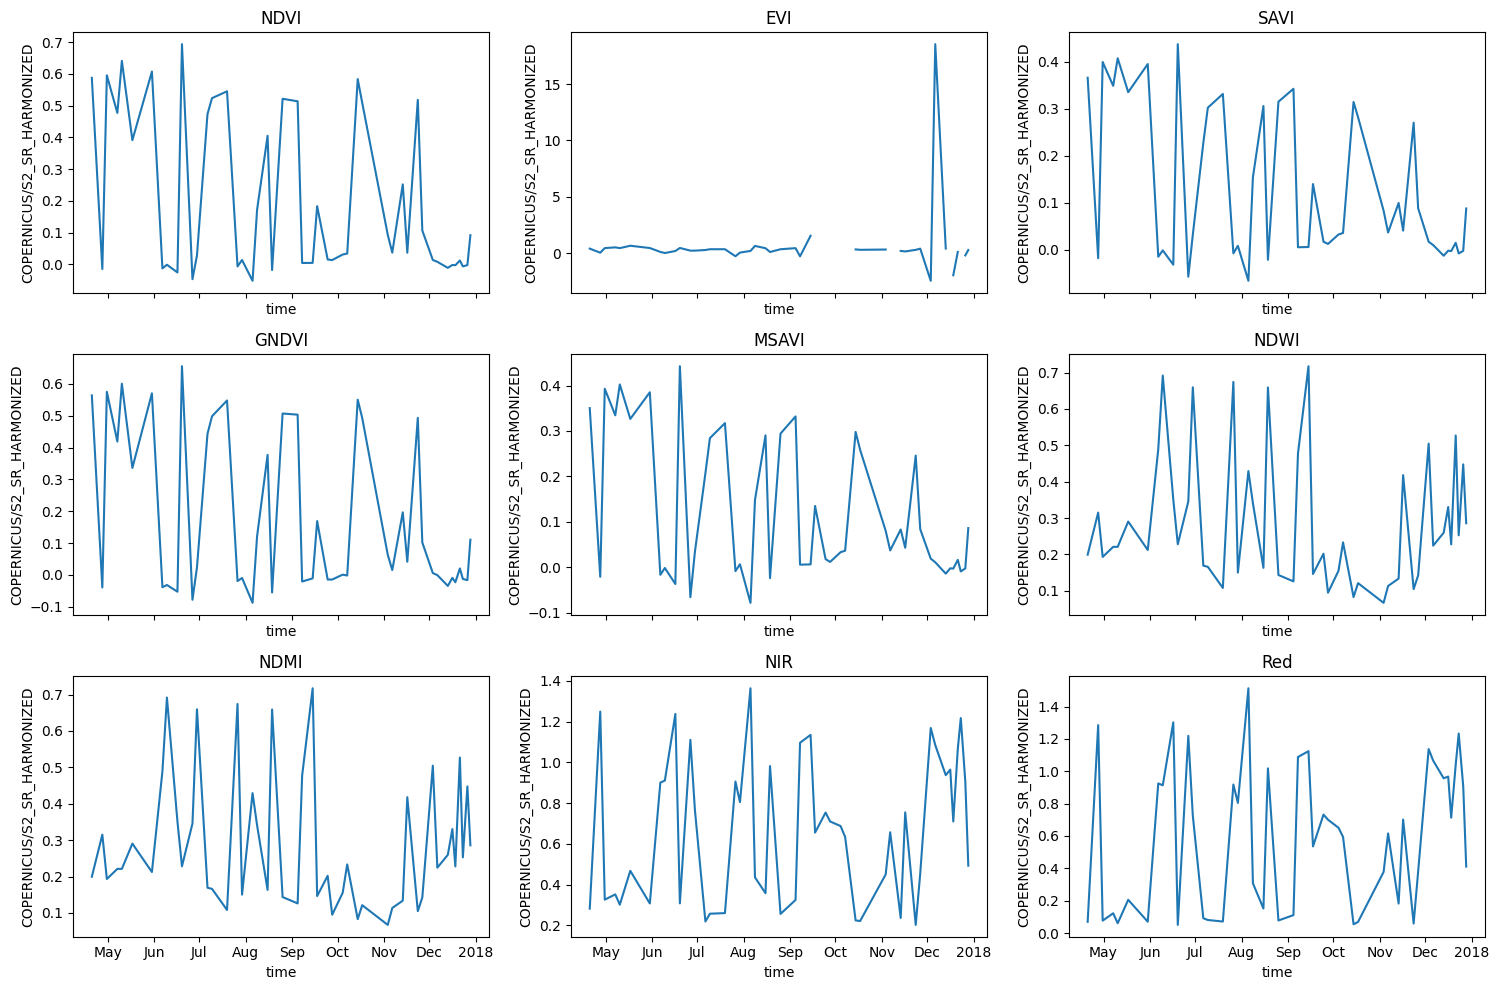

In [70]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10),sharex=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the indices and their corresponding labels
indices = [NDVI, EVI, SAVI, GNDVI, MSAVI, NDWI, NDMI, nir, red]
labels = ["NDVI", "EVI", "SAVI", "GNDVI", "MSAVI", "NDWI", "NDMI", "NIR", "Red"]

# Iterate over the indices and plot each on a separate subplot
for i, index in enumerate(indices):
    index.mean('x').mean('y').plot(ax=axes[i])  # Plot the first time step
    axes[i].set_title(labels[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [79]:
scale_factor = 0.0001
nir = dd.sel(band="B08")*scale_factor
red = dd.sel(band="B04")*scale_factor
green = dd.sel(band="B03")*scale_factor
swir1 = dd.sel(band="B11")*scale_factor
blue = dd.sel(band="B02")*scale_factor

NDVI = calculate_ndvi(nir, red)
EVI = calculate_evi(nir, red, blue)
SAVI = calculate_savi(nir, red)
GNDVI = calculate_gndvi(nir, green)
MSAVI = calculate_msavi(nir, red)
NDWI = calculate_ndwi(nir, swir1)
NDMI = calculate_ndmi(nir, swir1)


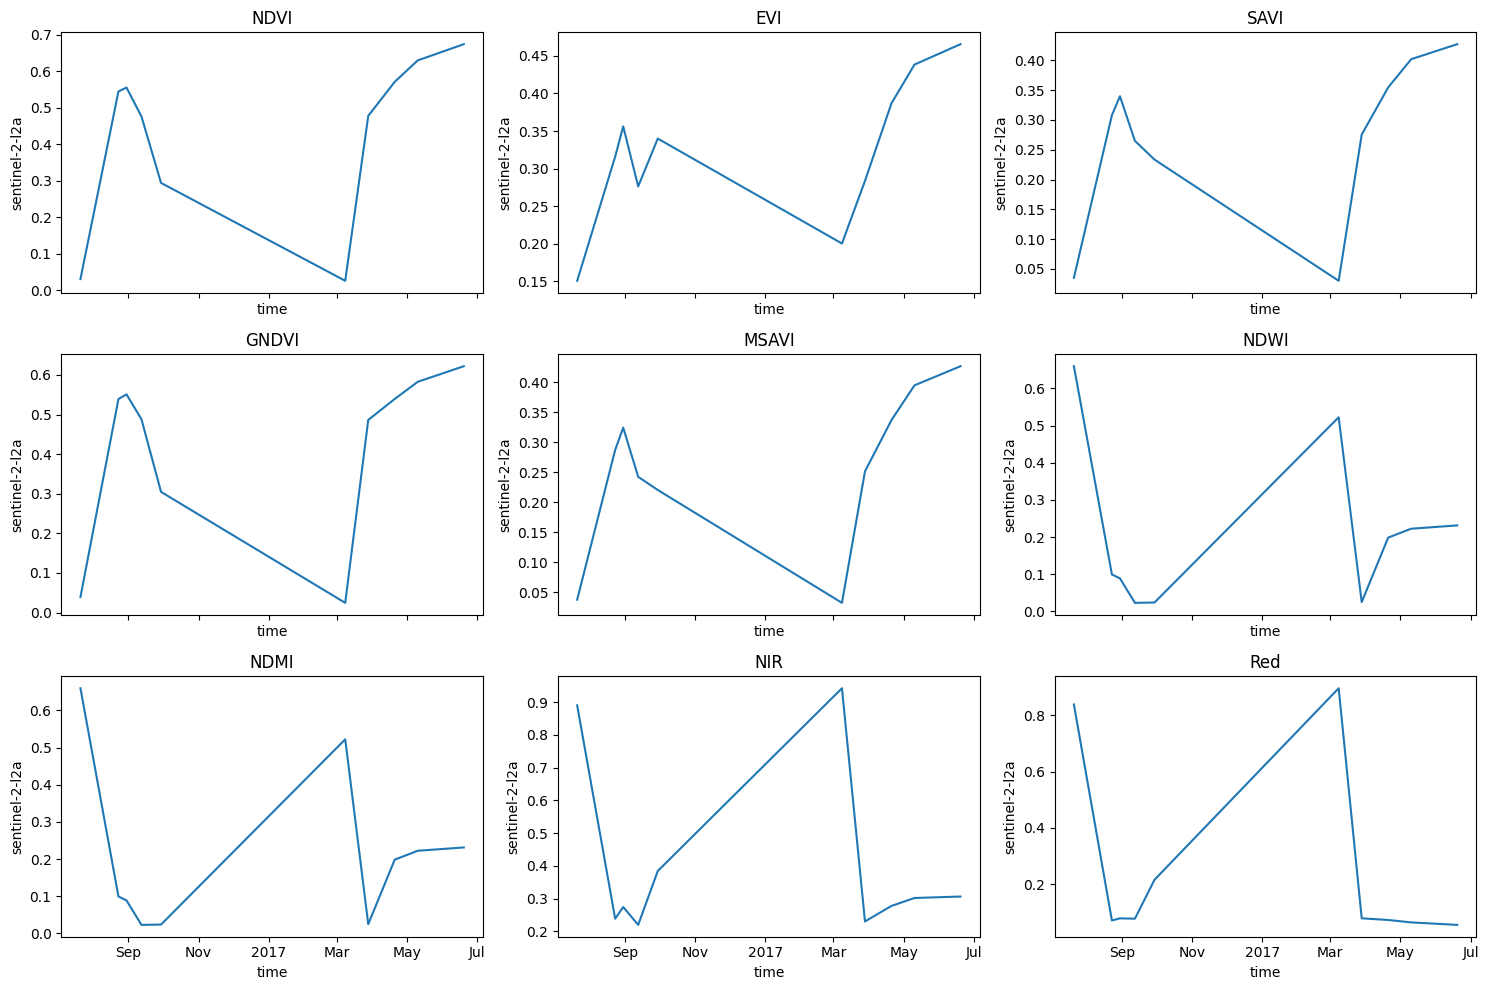

In [80]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10),sharex=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the indices and their corresponding labels
indices = [NDVI, EVI, SAVI, GNDVI, MSAVI, NDWI, NDMI, nir, red]
labels = ["NDVI", "EVI", "SAVI", "GNDVI", "MSAVI", "NDWI", "NDMI", "NIR", "Red"]

# Iterate over the indices and plot each on a separate subplot
for i, index in enumerate(indices):
    index.mean('x').mean('y').plot(ax=axes[i])  # Plot the first time step
    axes[i].set_title(labels[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()